# Assignment Applied Machine Learning BSc IK 

## Notebook made by

**Gebruik graag dit formaat**

* Voor de namen:  voornaam rest van je naam, voornaam rest van je naam,....
* je studentnummers: hetzelfde: scheidt met `,`
* je emails: hetzelfde: scheidt met `,`
* voor je groep: **alleen de hoofdletter** (iets als  `A` of `B` dus)

__Namen__: Basten Leeftink

__Emails__: basten@dds.nl

__Student ids__ : 14025361

__Groep__ : VervangMijDoorEenHoofdletter

## Toelichting

* Een aantal opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

# Applied Machine Learning W7

In the exercises of this week's assignment we are going to be focussing on Multilayer Perceptrons, and investigate what makes them tick, taking an in-depth look at activation functions, and on how we can apply these models to an actual real world task. Apart from this we will also be recapping on some of the data preprocessing techniques that we have touched on before, taking a more in-depth look at missing values and categorical variables.

For this assignment there is a total number of 15 points.

## Index

1. [Activation Functions](#activation)
2. [Number of Parameters in Neural Nets](#params)
3. [Categorical Variables](#categorical)
4. [Missing Values](#missing_values)
5. [MLPs in Action: Page Stream Segmentation](#mlp_pss)



In [1]:
 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

import os
import sklearn
from scipy.stats import mode
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets
# testing
from nose.tools import assert_count_equal, assert_equal, assert_almost_equals
from numpy.testing import *
from pandas.testing import assert_frame_equal

# Inline plotting
%matplotlib inline

# Please do not remove this: 
np.random.seed(31415)

<h1><a id="activation">Plot activation functions</a></h1>

In this first exercise we we will be taking a look at activation functions.

Consider the code below which plots 2 activation functions, tanh and relu, and complete the exercises below.
 
 1. Complete the sigmoid function given below, which should work on an input array `x`, you can use the `np.exp` function for this.
 2. We are going to plot this data using Pandas.
     * Create a pandas dataframe with index `line` and three columns `['sigmoid', 'tanh', 'relu']` (in this order), for the three activation functions.
     * Plot the three activation functions from the dataframe with pandas.

Text(0, 0.5, 'relu(x), tanh(x)')

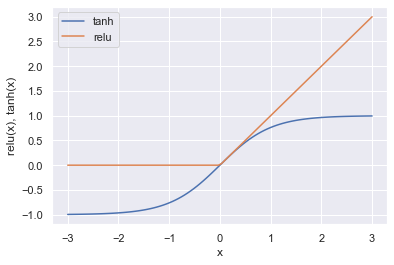

In [2]:
# We are plotting activation functions for the line below
def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x, 0)

line = np.linspace(-3, 3, 100)
plt.plot(line, tanh(line), label="tanh")
plt.plot(line, relu(line), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

In [9]:
from numpy import exp
def sigmoid(x):
    '''
    Function that given an input array x computes the sigmoid function on
    each element in x, the returned results should be a numpy array
    '''
    return 1/(1 + np.exp(-x))


Text(0, 0.5, 'relu(x), tanh(x)')

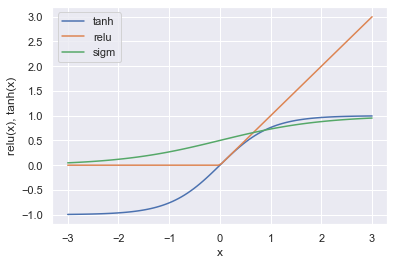

In [10]:
line = np.linspace(-3, 3, 100)
plt.plot(line, tanh(line), label="tanh")
plt.plot(line, relu(line), label="relu")
plt.plot(line, sigmoid(line), label="sigm")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

In [11]:
# check for the return type
assert_equal(type(sigmoid(np.array([0.5, 1.2, 1.7]))), np.ndarray)
# Also check for the correct shape, output shape should be same as the input shape
assert_equal(np.array([0.5, 1.2, 1.7]).shape, sigmoid(np.array([0.5, 1.2, 1.7])).shape)

In [34]:
# Values for which we do the plot
line = np.linspace(-3, 3, 100)
columns = ['sigmoid', 'tanh', 'relu']
D= pd.DataFrame(columns=columns, index=line)
D['sigmoid'] = sigmoid(line)
D['tanh'] = tanh(line)
D['relu'] = relu(line)

#WRITE YOUR CODE HERE
D.columns

Index(['sigmoid', 'tanh', 'relu'], dtype='object')

In [35]:
# D must have these columns, in this order, we also check that the index is correct
assert_equal(type(D), pd.DataFrame)
assert_array_equal(D.columns,['sigmoid', 'tanh', 'relu'])
assert_array_equal(D.index, line)


<h1><a id="params">Number of parameters</a></h1>

The book has this computation of the number of parammeters in an MLP. But they forgot something.

* What?
* Explain how you would compute the correct amount.
* Compute again and answer in the `correct_number_of_parameters` variable.

>A helpful measure when thinking about the model complexity of a neural network is the number of weights or coefficients that are learned. If you have a binary classifica‐ tion dataset with 100 features, and you have 100 hidden units, then there are 100 * 100 = 10,000 weights between the input and the first hidden layer. There are also 100 * 1 = 100 weights between the hidden layer and the output layer, for a total of around 10,100 weights. [page 120]

 >Ze zijn vergeten om de bias toe te voegen aan het aantal parameters. Dit zijn er in totaal 100.

In [36]:
correct_number_of_parameters= 10200 # change to your answer
#WRITE YOUR CODE HERE
correct_number_of_parameters

10200

In [37]:
assert isinstance(correct_number_of_parameters, int)

### Larger Neural Networks

1. How many parameters must an MLP with 33 input nodes and 15 hidden layers each having 78 nodes learn? (variable `v15_78`)
2. Give all MLP architectures with exactly N parameters to learn (don't forget the biases!), you don't have to repeat different permutations of the same network.
    * You may choose N, but hey, come on, don't choose it too childish eh. Like 1 or so, or 2. 

In [ ]:
v15_78=96060
#WRITE YOUR CODE HERE
v15_78

In [ ]:
assert isinstance(v15_78, int)

YOUR ANSWER HERE

<h1><a id="categorical">Categorical variables</a></h1>

1. What is one hot encoding? Explain and give a clear example.
2. Suppose you have a dataset that has two features that are both categorical `var1` and `var2` (so the dataframe with the train features has two columns) with `var1` having `3` possible values and `var2` having `5` possible values, what is the dimension of the feature vector if we one-hot encoded both variables? Give your answer as the value of the `one_hot_encoded_size_var1_var2`


> One hot encoding is een techniek die gebruikt wordt om categorieën of labels om te zetten naar een numerieke representatie. 
Hier een voorbeeld:

Peer: [1, 0, 0]
Citroen: [0, 1, 0]
Banaan: [0, 0, 1]

In [38]:
one_hot_encoded_size_var1_var2 = 8


In [39]:
assert_equal(type(one_hot_encoded_size_var1_var2), int)

<h1><a id="missing_values">Missing values</a></h1>

The [DS handbook](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.04-Feature-Engineering.ipynb) contains a section on missing data, but our own  sklearn book doesn't. Read up on it. The keywords are: missing values and imputation. It is important to remove missing values from our data, as many operations will not work with this (think of calculating cosine similarity with vectors containing NaNs in K nearest neighbour).

We have already experimented with this in previous notebooks, and now we will do the same things also using pandas and numpy, investigating the differences between removing NaNs in the different libraries.

1. What would you do with rows in your training set which have a few missing values?
    * Motivate and explain. Give pros and cons. And what you can do in which situation.
     
2. Now you want to *repair* your X. How? Of course, you repair every column seperately.
    
    * With a categorical variable: how can you repair that wisely? Motivate!
    
    * With a numeric variable: how can you repair that wisely? Motivate! Did you use a hidden assumption about your data?
    * What if your data is lognormal distributed (like income, or number of received likes). What would be your best choice?
    
3. Make a test in pandas by which you find out which columns contain missing data, by completing the `number_of_missing_values` function. Return a dictionary where each key-value pair is the column name as a string and the values is the number of missing values in that column.
4. We have given you a small example array `data_with_nan`, which contains the `age` and `embark_town` columns from the titanic dataset, and your task is to repair it in `pandas`, `numpy` and `sklearn`, using the median for `age` and the mode for `embark_town`.


In the markdown cell below, explain what do do when your data contains a few NaN values.

> Of de hele rij verwijderen of upvullen met een gemiddelde of een mediaan ofzo. Als je de rij verwijdert dan krijg je minder training data maar wel meer acuraat. Als je het opvult dan heb je  meer data maar wat minder acuraat. 

And in the cell below, explain what you would to to repair them, both for categorical and continuous features.

> Zoals hierboven al beschreven zal ik deze vervangen door het gemiddelde (bij numerieke data) en een mediaan bij catagorische variables

In [49]:
def number_of_missing_values(dataframe) -> dict:
    missing_values = dataframe.isna().sum().to_dict() # fill this dict with key values pairs where the key is the column and the value is the number if nan values in the column
    #WRITE YOUR CODE HERE
    return missing_values


example_dataframe = pd.DataFrame({'a': [0, 1, np.nan], 'b': [1, np.nan, 4], 'c': [np.nan, np.nan, 3], 'd': [13,  9, 2]})
number_of_missing_values(example_dataframe)

{'a': 1, 'b': 1, 'c': 2, 'd': 0}

In [50]:
# Check that we get the right output from your function
test_df = pd.DataFrame({'a': [0, 1], 'b': [1, np.nan]})
assert_equal(type(number_of_missing_values(test_df)), dict)
# do we get the right dict size?
assert_equal(len(number_of_missing_values(test_df)), 2)

In this next exercise, remove the nan values from the `titanic` dataframe using `pandas`, `numpy` and `sklearn` in the corresponding code cells, where you use the median for the `age` column, and the mode for the `embark_town` column. In all case, you are allowed to use `fillna` from Pandas to fill the NaN values once you calculated the right values to replace them with.

In [60]:
# First with pandas
import seaborn as sns
# We will work on two columns of the titanic dataset
data_with_nan = sns.load_dataset('titanic')[['age', 'embark_town']]

data_with_nan['age'] = data_with_nan['age'].fillna(data_with_nan['age'].median()) # replace with you answer
data_with_nan['embark_town'] = data_with_nan['embark_town'].fillna(data_with_nan['embark_town'].mode()[0]) # replace with you answer

#WRITE YOUR CODE HERE

In [61]:
assert_equal(data_with_nan['age'].isna().sum(), 0)
assert_equal(data_with_nan['embark_town'].isna().sum(), 0)


In [97]:
from scipy import stats

# Now with Numpy
# TIP: scipy.mode will no longer work for non-numeric arrays, you 
# can use a workaround with np.unique and return_counts=True, where you have to 
# skip the nan values for the mode calculation
data_with_nan = sns.load_dataset('titanic')[['age', 'embark_town']]

median_age = np.nanmedian(data_with_nan['age'].values)
mode_town = stats.mode(data_with_nan['embark_town'])[0][0]

data_with_nan['age'] = data_with_nan['age'].fillna(median_age) # replace with you answer
data_with_nan['embark_town'] = data_with_nan['embark_town'].fillna(mode_town)  # replace with you answer

#WRITE YOUR CODE HERE

In [98]:
assert_equal(data_with_nan['age'].isna().sum(), 0)
assert_equal(data_with_nan['embark_town'].isna().sum(), 0)


In [103]:
# And finally with sklearn
# If you get a ValueError with the SimpleImputer and the 'most_frequent' parameter
# make sure the output of the imputer is a 1D array (you can use np.ravel to enfore this)
# 
from sklearn.impute import SimpleImputer
data_with_nan = sns.load_dataset('titanic')[['age', 'embark_town']]

imputer_median = SimpleImputer(strategy='median')
inputer_mode = SimpleImputer(strategy='most_frequent')

data_with_nan['age'] = imputer_median.fit_transform(data_with_nan[['age']]) # replace with you answer
data_with_nan['embark_town'] = inputer_mode.fit_transform(data_with_nan[['embark_town']]) # replace with you answer

#WRITE YOUR CODE HERE

In [104]:
assert_equal(data_with_nan['age'].isna().sum(), 0)
#assert_equal(data_with_nan['embark_town'].isna().sum(), 0)


<h1><a id="mlp_pss">Page stream segmentation with an MLP</a></h1>

Now that we have taken a look at the Multilayer Perceptron, we are going to use it to tackle a real world classification task.

In this excercise we are going to tackle a classification problem called **Page Stream Segmentation**. In this task the goal is to determine, based on text of pages, which page starts a new document, which is for example useful in cases where multiple documents are scanned in consecutively and they need to be separated. (If you want to read more about this, check out our paper on this where we also explain the dataset we introduced.)

Text is tricky to work with in MLPs, as there is no fixed number of features, the text length is variable. As you probably know, an MLP expects the input to have a fixed number of variables. For this exercise we are not going to worry about this too much, and you are allowed to use the `CountVectorizer` method from Sklearn, which will create fixed-size vectors for each page by counting words.  

We are going to conduct a complete ML experiment: loading and cleaning data, splitting the data in train, validation and test, run a baseline, develop our own method, and evaluate the results. To help you along, the excercise is split up into several parts.

## Part 1: Reading and cleaning the data

First, read in the data, and clean it up so that it contains no more NaN values (you can just use the empty string to fill them). Also make sure the the `label` column is of the `int` type. As always, use the `loadfile` function below to get the right path for the dataloading, this is essential for autograding.

In [99]:
def loadfile():
    if 'data.csv' in os.listdir():
        return 'data.csv'
    elif os.path.exists('../../data/Week7/'):
        return '../../data/Week7/data.csv'
    elif os.path.exists('../../../data/Week7/'):
        return '../../../data/Week7/data.csv'


In [120]:
data = pd.read_csv(loadfile()) # Load in the dataframe here
data = data.fillna("")
type(data["label"][0])

numpy.int64

In [109]:
assert_equal(data.shape[0], 2500)

## Part 2: Splitting the data and converting to vectors

Split the data into train, validation and tests splits, with a 60, 20, 20 percent distribution over these sets, assuring that the data is stratified. You are allowed to use the `train_test_split` function from sklearn here.


In [110]:
from sklearn.model_selection import train_test_split
X = ?
y = ?

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)

#WRITE YOUR CODE HERE

ValueError: At least one array required as input

In [ ]:
assert_equal(X_train.shape[0], 1500)
assert_equal(X_val.shape[0], 500)
assert_equal(X_test.shape[0], 500)

In the cell below convert the text of the pages into vectors containing words counts. Use the `CountVectorizer` method for this. Take a look at the documentation for the Countvectorizer, how should you use it? This should feel familiar to other sklearn functions.

In [ ]:
# Implement your text conversion step here
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(2, 3))

X_train_vectors = None
X_val_vectors = None
X_test_vectors = None

#WRITE YOUR CODE HERE

In [ ]:
# if you did this correctly then all three arrays should have the same number of features
assert X_train_vectors.shape[1] == X_val_vectors.shape[1] == X_test_vectors.shape[1]

## Part 3: Classification

Now that we have read in and prepared the data we will implement the baseline model and our own model. 
1. For the baseline model you MUST implement a single node MLP network (of course it isnt really Multilayer now) with a sigmoid activation fuction (in essence logistic regression). Make this model in the cell below and run the model on the test set we just created.
2. For your own finetuned model you must implement an MLP network, but the exact size, activation function and other parameters are up to you, you should experiment with these and find the one that works best.
3. Try to be smart with this, the dataset is quite large so a simple grid search over many values will take a lot of time. You can also try to experiment with parameters from the `CountVectorizer` method, for example changing the minimum and maximum frequencies of which words are considered, this might increase performance of the model and reduce running time.

As a reminder, you should use the validation set to test different settings of your model, and then pick the best model and run this on the test set. For the evaluation on both the validation and the test set you should calculate precision, recall and F1 on the positive class, and use this to select your best model.

In [ ]:
# Implement the baseline model in this cell
# You will most likely get a warning about the maximum number of iterations, this is fine
np.random.seed(1234) # do not change this!

from sklearn.neural_network import MLPClassifier # use 42 as the random_state!
baseline_model = None
baseline_model_predictions=None

#WRITE YOUR CODE HERE

In [ ]:
# Do you get the right output shape?
assert_equal(baseline_model_predictions.shape, y_test.shape)

In the cell below, implement you own MLP network, where you finetune the parameters on the validation set, and report the predictions of you best model on the test set.

In [ ]:
# Implement your own tuned MLP model in this cel
my_model = None
my_model_predictions = None
# Implement the training and evaluation below

#WRITE YOUR CODE HERE

print(my_model_predictions.shape)
assert_equal(my_model_predictions.shape, y_test.shape)

## Part 4: Evaluation

Now that you have implemented and tuned your network it is time to evaluate the network on the held out test set. For this calculate precision, recall and F1 for the positive on the positive class, and report the results for both the baseline and your own model. You can use the `classification_report` function, but explain what you look at, micro, macro, or weighted, and why? As with the previous exercises, make a nice report of the P,R and F1 scores of the single node baseline and you method in a table where you show the differences between the methods, also feel free to make some nice plots.

In [ ]:
from sklearn.metrics import classification_report
baseline_P, baseline_R, baseline_F1 = None, None, None
my_model_P, my_model_R, my_model_F1 = None, None, None

#WRITE YOUR CODE HERE